In [53]:
#lets compute those formulas from that thing

#frequency delay

import astropy
from astropy import units as u
from astropy import constants as const
from astropy.coordinates import Angle
from astropy.coordinates import SkyCoord
#from astropy import units as u

#np.set_printoptions(threshold=sys.maxsize) #see all elements, dont truncate

#fv = ;
beta = 0.5
psrObj = SkyCoord(ra=19.37*u.degree, dec=21*u.degree, distance=1*u.kpc)

NameError: name 'np' is not defined

In [54]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

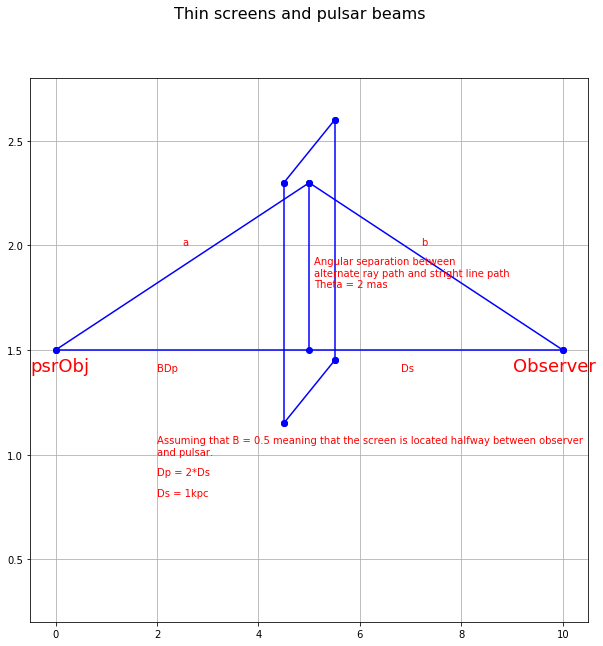

In [56]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


figure = plt.figure()
ax = figure.add_subplot(111)

plt.suptitle('Thin screens and pulsar beams', fontsize=16)

#plotArray = [x1, y1, x2, y2, x3, y3]
x1, y1 = [0, 10], [1.5, 1.5] #Dp
x2, y2 = [0, 5 ], [1.5, 2.3]  #a
x3, y3 = [5, 10], [2.3, 1.5] #b
x4, y4 = [5, 5 ], [2.3, 1.5]  #some angular mas

#The screen.
sX1, sY1 = [4.5 , 5.5], [ 2.3  , 2.6]

sX2, sY2 = [4.5 , 4.5], [2.3, 1.15]  #
sX3, sY3 = [5.5 , 5.5], [2.6, 1.45] #

sX4, sY4 = [4.5 , 5.5], [1.15, 1.45]  #

#Text
plt.text(-0.5, 1.4, 'psrObj', color='red', fontsize = 18)
plt.text(9.025, 1.4, 'Observer', color='red', fontsize = 18)
plt.text(5.1, 1.8, 'Angular separation between \nalternate ray path and stright line path\nTheta = 2 mas', color='red', fontsize = 10)

plt.text(2, 1.4, 'BDp', color='red', fontsize = 10)
plt.text(6.8, 1.4, 'Ds', color='red', fontsize = 10)

plt.text(2, 1, 'Assuming that B = 0.5 meaning that the screen is located halfway between observer\nand pulsar.', color='red', fontsize = 10)
plt.text(2, 0.9, 'Dp = 2*Ds', color='red', fontsize = 10)
plt.text(2, 0.8, 'Ds = 1kpc', color='red', fontsize = 10)

plt.text(2.5, 2, 'a', color='red', fontsize = 10)
plt.text(7.2, 2, 'b', color='red', fontsize = 10)


plt.ylim([0.2, 2.8])

plt.grid();

plt.plot(x1, y1, x2, y2, x3, y3, x4, y4 , sX1, sY1, sX2, sY2 , sX3, sY3 , sX4, sY4  , color = 'blue', marker = 'o')
figure.set_size_inches(10, 10)
plt.show()

psrObj

In [4]:
#Dp
psrObj.distance #this is not constant

<Distance 1. kpc>

In [5]:
psrObj.distance.to(u.m) 

<Distance 3.08567758e+19 m>

In [6]:
const.c #this is a constant

<<class 'astropy.constants.codata2014.CODATA2014'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2014'>

In [7]:
diffAngle = Angle(2, u.mas) #two mili arc second
diffAngle.radian

9.69627362219072e-09

In [8]:
vt = 300 * u.km /(1 * u.s)
vt

<Quantity 300. km / s>

In [9]:
vt.to(u.m/u.s)

<Quantity 300000. m / s>

In [10]:
freq = 10**9*u.Hz
freq

<Quantity 1.e+09 Hz>

In [11]:
#now calculate delay doppler frequency

#spectral fringe rate for stationary phase paths is Ds*(theta^2)/2*c*beta

#note to the reader:
#ditance kilo parsecs must convert to metres
#anglular separation between straight path and alternate path must convert to radian

Fv = (psrObj.distance.to(u.m))*(diffAngle.radian**2)/(2*(const.c)*(0.5))
print("The expected geometric delay:")
Fv

The expected geometric delay:


<Quantity 9.67697385e-06 s>

In [57]:
print("which is about 10 us")

which is about 10 us


In [12]:
type(Fv)

astropy.units.quantity.Quantity

In [13]:
#now calculate Ft

In [14]:
lamb = (const.c/freq).to(u.m)
lamb

<Quantity 0.29979246 m>

In [58]:
#calculate using astropy
Ft = ((diffAngle.radian*vt.to(u.m/u.s))/(lamb*0.5)) #this is the correct answer
Ft.to(u.Hz)

<Quantity 0.01940597 Hz>

In [59]:
bPeriod = 1/Ft
bPeriod

<Quantity 51.53052772 s>

In [60]:
#verify

Ftverify = ((10**-8)*(3*10**5))/((0.3)*(0.5))
Ftverify * u.Hz

<Quantity 0.02 Hz>

In [61]:
bPeriodVerify = 1/Ftverify
bPeriodVerify

50.0